In [319]:
#!pip install pytesseract 
#!C:\Users\Prith\anaconda3\python.exe -m pip install --upgrade pip

# Start from Chirag img top the variable are reused and thus messed up a bit 

In [180]:
import numpy as np
import cv2
import os
import pytesseract as tess
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [318]:
def get_text(image): 
    custom_oem_psm_config = r'--oem 3 --psm 7'
    text = tess.image_to_string(image,lang='eng',config=custom_oem_psm_config)
    print(text)

Trial

In [156]:
image=cv2.imread(r'./clean_plates/2022-03-12--12-46-26--0.jpg',0)

In [10]:
def show(image):
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.show()

In [135]:
_ , thresh= cv2.threshold(blurred,110,255,cv2.THRESH_BINARY)

In [137]:
blurred = cv2.GaussianBlur(image, (7, 7), 0)

In [138]:
(T, thresh) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [164]:
filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16.5,-2,-1],[0,-.5,-2,-1,0],[0,0,-1,0,0]])
sharp=cv2.filter2D(image,-1,filter)
sharp=cv2.addWeighted(sharp, 4, cv2.GaussianBlur(sharp, (0, 0), 10), -4, 128) 

In [140]:
img2 = cv2.Sobel(image,cv2.CV_8U,1,0,ksize=3)	
_,img2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

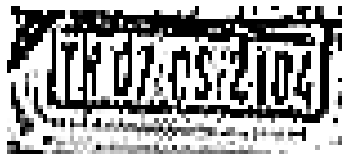

In [165]:
show(sharp)

In [195]:
image2=cv2.imread(r'./clean_plates/2022-03-12--13-21-36--0.jpg',0)

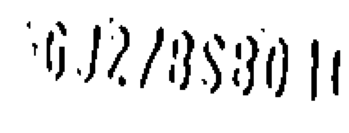

In [198]:
sobel = cv2.GaussianBlur(image2, (7, 7), 0)
sobel = cv2.Sobel(sobel,cv2.CV_8U,1,0,ksize=3)	
_,sobel = cv2.threshold(sobel,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
show(sobel)

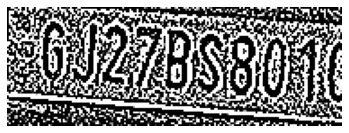

In [197]:
filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16.5,-2,-1],[0,-.5,-2,-1,0],[0,0,-1,0,0]])
sharp=cv2.filter2D(image2,-1,filter)
sharp=cv2.addWeighted(sharp, 4, cv2.GaussianBlur(sharp, (0, 0), 10), -4, 128) 
show(sharp)

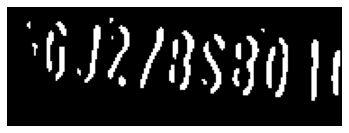

**Image Chirag Car**

In [214]:
path=r'./clean_plates/2022-03-12--17-37-05--0.jpg'

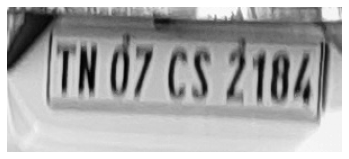

In [215]:
image=cv2.imread(path,0)
show(image)

**Sobel**

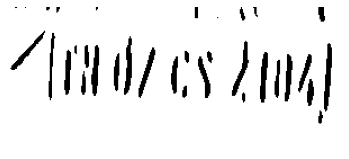

In [216]:
sobel = cv2.GaussianBlur(image, (7, 7), 0)
sobel = cv2.Sobel(sobel,cv2.CV_8U,1,0,ksize=3)	
_,sobel = cv2.threshold(sobel,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
show(sobel)

**Laplacian sharpening**

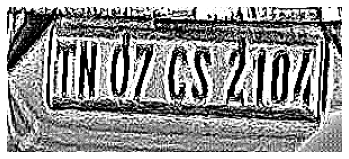

In [224]:
filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16.5,-2,-1],[0,-.5,-2,-1,0],[0,0,-1,0,0]])
sharp=cv2.filter2D(image,-1,filter)
sharp=cv2.addWeighted(sharp, 4, cv2.GaussianBlur(sharp, (0, 0), 10), -4, 128) 
show(sharp)

In [307]:
get_text(sharp)

**Laplace+Threshhold**


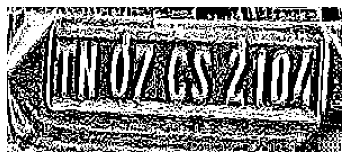

In [308]:
_,sharp_thresh=cv2.threshold(sharp, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show(sharp_thresh)

**Otsu Threshold**


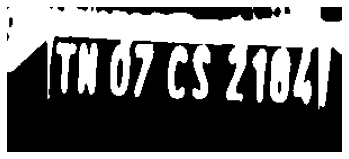

In [316]:
blurred=cv2.GaussianBlur(image, (7, 7), 0)
(T, thresh) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#cv2.imwrite('temp.jpg',thresh)
show(thresh)

In [317]:
get_text(thresh)
# from PIL import Image
# with Image.open(r'./temp.jpg') as im:
#    get_text(im)
    

rngT cone

rn gT Cone



**Erosion+Thresh**

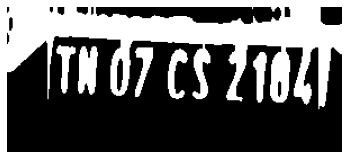

In [313]:
eroded_th = cv2.erode(thresh.copy(), (3,3), iterations=3)
show(eroded_th)

In [292]:
get_text(eroded_th)

ner cena



**Morphological Erosion**

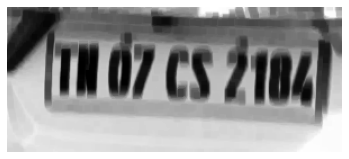

In [231]:
for i in range(0, 3):
	eroded = cv2.erode(image.copy(), None, iterations=i + 1)
show(eroded)

In [322]:
print(tess.image_to_string(eroded))

“iin7 C8 iu)



**Morphological Opening**

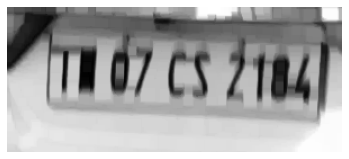

In [263]:
kernelSizes = [(3, 3), (5, 5), (7, 7)]
openning=blurred
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
show(opening)

**Morphological Gradient**

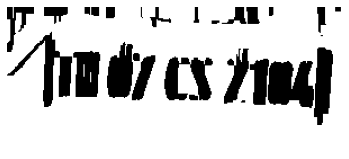

In [272]:
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
g_e= cv2.erode(gradient.copy(), (3,3), iterations=8)
_,g_e_t=cv2.threshold(g_e, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show(g_e_t)